# Donovan Feist

# CH EN 3603

# Homework 11

# Problem 2

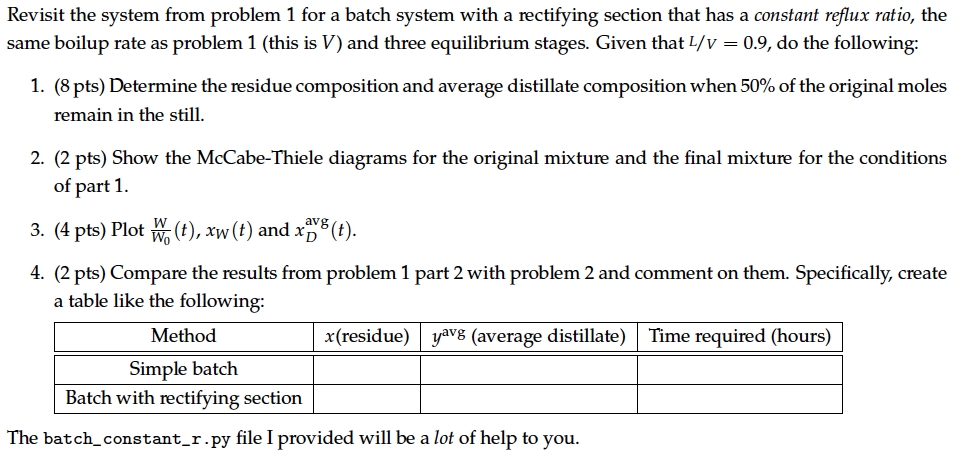

## part 1 solution

Given the equation

### $\int_{x_{W_0}}^{x_W} \frac{dx_W}{x_D-x_W}=ln(\frac{W}{W_0})$

we need to vary the change of $x_W$ multiple times to generatre enough data points of $x_D$ and $x_W$ to numerically integrate over. Once the value of the integral is equal to the value of $ln(\frac{W}{W_0})$, the correct value for $x_W$ has been found.

Once $x_W$ is known, $x_D^{avg}$ can be found with the equation

### $x_D^{avg}=\frac{x_{W_0} W_0 - x_W W}{W_0-W}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

def batch_constant_r( xeq, yeq, Teq, Nstage, x0, xw, xdguess, LV, doPlot ):
    '''
    This function calculates the distillate composition that corresponds to
    the given residue composition for a batch distiller with a rectifying
    section that has a constant reflux ratio.
    
     INPUTS:
       xeq  - equilibrium liquid mole fractions
       yeq  - equilibrium vapor mole fractions
       Teq  - equilibrium temperature
       Nstage - number of equilibrium stages
       x0   - initial charge composition in the still
       xw   - the residue composition
       xdguess - a guess for the distillate composition
       Lv      - Liquid/Vapor ratio in the rectifying section
       doPlot  - a flag to trigger plotting the McCabe-Thiele diagram. 
                 (False - don't plot, True - plot)
    
     OUTPUT:
       The distillate composition corresponding to the supplied residue
       composition.  Note that this is only consistent when it is equal to the
       supplied xdguess.
    
    Author: James C. Sutherland
    '''
    # Build functions to interpolate the Txy data. 
    # These functions are essentially shortcuts that we will use below
    eval_y = lambda x: np.interp(x,xeq,yeq)
    eval_T = lambda x: np.interp(x,xeq,Teq) 

    xd = xdguess   # current guess for the distillate composition

    '''
    Create a function to evaluate the liquid composition from the operating line.
    This comes from solving the linear equation:
       y = slope * (x-x1) + y1
    for x, with (x1,y1) a point on the line (the distillate point in this case)
    '''
    eval_xop = lambda y: (y-xd)/LV+xd

    if doPlot:
        xx = np.linspace(0,xdguess)
        yy = eval_y(xx)
        plt.figure(figsize=(7,7))
        plt.plot(xx,yy,'b-')
        plt.plot([0,1],[0,1],'k-')
        plt.grid()
        plt.axis('equal')
        plt.axis([0,1,0,1])
        plt.xlabel('Liquid Benzene Mole Fraction')
        plt.ylabel('Vapor Benzene Mole Fraction')
        yy = np.linspace(0,xd)
        plt.plot(eval_xop(yy),yy,'r--')  # the operating line

    # we start the plot at the residue composition given.
    xop = xw;
    yop = 0;

    for i in range(0,Nstage):
        # set the equilibrium composition in the liquid. This is a vertical line
        # from the operating line (stepping up), so it is equal to xop.
        xstage = xop

        # set the vapor composition in equilibrium with xstage.  This comes from
        # interpolating the equilibrium data.
        ystage = eval_y( xstage )

        if doPlot:
            plt.plot( [xop,xstage],[yop,ystage],'g-')

        # step over to the operating line.  Here we know the vapor composition,
        # and need to find the liquid from the operating line.
        yop = ystage
        xop = eval_xop( yop )

        if doPlot:
            plt.plot( [xstage,xop],[ystage,yop],'g-')
            plt.text(xstage-.03,ystage+.03,str(i));

    if doPlot:
#         print( 'Distillate composition: {:.4f}'.format(xop))
        plt.show()

    return xop

In [2]:
data=pd.read_csv('Txy.csv')
Teq=data['T'].values
xeq=data['x'].values
yeq=data['y'].values

In [3]:
Nstage=3
x0=0.70
xw=0.3
xdguess=0.9
LV = 0.9

W0=10000 #mol
W=(1-0.5)*W0 #mol
rhs=np.log(W/W0)

def func(xwguess):
    xw=np.linspace(x0,xwguess,len(xeq))
    xd=np.ones(len(xeq))
    integrand=np.ones(len(xeq))
    for i in range(0,len(xw)-1):
        def function(x):
            return x-batch_constant_r( xeq, yeq, Teq, Nstage, x0, xw[i], x, LV, False )
        xd[i]=fsolve(function,xdguess)
        integrand[i]=1/(xd[i]-xw[i])
    integral=np.trapz(integrand,xw)
    r=rhs-integral
    return r

a=func(0.4499)
xWfinal=0.4499
print('x_W=',xWfinal)

xDavg=(x0*W0-xWfinal*W)/(W0-W)
print('x_D^avg=',xDavg)

x_W= 0.4499
x_D^avg= 0.9501


The residue composition is $\boxed{x_W=0.450}$.

The average distillate composition is $\boxed{x_D^{avg}=0.950}$.

## part 2 solution

In [4]:
x_w = np.linspace(x0,xWfinal,len(xeq))
x_d = np.ones(len(x_w))
x_int = np.ones(len(x_w))
for i in range(0,len(x_w)):
    def func(x):
        return x-batch_constant_r(xeq, yeq, Teq, Nstage, x0, x_w[i], x, LV, doPlot=False)
    x_d[i] = fsolve(func,0.7)
    x_int[i] = 1/(x_d[i]-x_w[i])

Below is the McCabe-Thiele diagram for the original mixture.

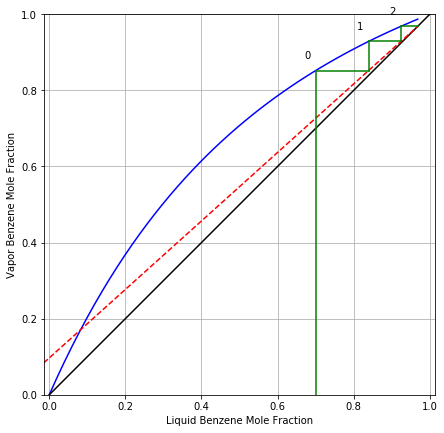

0.9683431713606637

In [5]:
batch_constant_r(xeq, yeq, Teq, Nstage, x0, x_w[0], x_d[0], LV, doPlot=True)

Below is the McCabe-Thiele diagram for the final mixture.

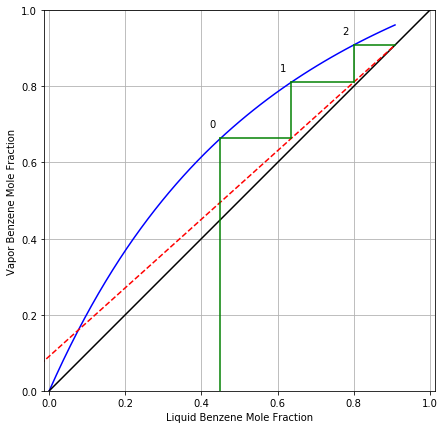

0.9086471390317272

In [6]:
batch_constant_r(xeq, yeq, Teq, Nstage, x0, x_w[-1], x_d[-1], LV, doPlot=True)

## part 3 solution

### $W=W_0-\frac{Vt}{R+1} \Rightarrow$

### $\frac{W}{W_0}=1-\frac{Vt}{R+1}$

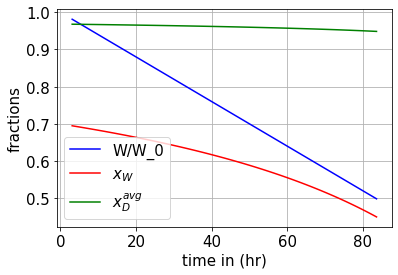

83.57840197213434


In [7]:
W0 = 10000
xwnew=xWfinal
xw = np.linspace(x0,xwnew,len(xeq))
xd = np.ones(len(xw))
xint = np.ones(len(xw))
A = []

for i in range(0,len(xw)):
    def func(x):
        return x - batch_constant_r(xeq, yeq, Teq, Nstage, x0, xw[i], x, LV, doPlot=False)
    xd[i] = fsolve(func,0.7)
    xint[i] = 1/(xd[i]-xw[i])
    A.append(float(np.trapz(xint[:i+1],xw[:i+1])))

W_W0 = np.exp(A)
W_W0_new = W_W0[1:len(W_W0)]
W = W0*W_W0_new
xw_new = xw[1:len(x_w)]
xavgD = (x0*W0-xw_new*W)/(W0 - W)
V = 10

t = (W0-W)/(V*(1-LV))/60

plt.rcParams.update({'font.size':15})
plt.plot(t,W_W0_new,'b')
plt.plot(t,xw_new,'r')
plt.plot(t,xavgD,'g')
plt.xlabel('time in (hr)')
plt.ylabel('fractions')
plt.legend(('W/W_0','$x_W$','$x_D^{avg}$'))
plt.grid()

plt.show()
print(t[-1])

## part 4 solution

| method                        	| x (residue) 	| yavg (average distillate) 	| Time required (hours) 	|
|-------------------------------	|-------------	|---------------------------	|-----------------------	|
| Simple Batch                  	| 0.581       	| 0.819                     	| 8.33                  	|
| Batch with rectifying section 	| 0.450       	| 0.950                     	| 83.6                  	|

From the data in the table above, we can see that when vaporizing 50 mole% of the initial batch contents, using a rectifying section will take significantly longer than a simple batch process (about 10 times longer). However, the average light-key mole fraction of the distillate is significantly higher when using a rectifying section in the process. This suggests that if a pure stream of the light-key species is desired, a batch process with a rectifying section should be used, with the understanding that significantly more time will be needed.